# Sewer Charge Analysis

### Install packages

In [3]:
%pip install torch
%pip install pandas
%pip install scipy
%pip install openpyxl
%pip install anaconda
%pip install seaborn
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


### Load CSV

In [7]:
import pandas as pd
import numpy as np
from scipy.stats import linregress
import sys

# Verify the Python interpreter path
print("Python interpreter path:", sys.executable)

# Reading the Excel files
df = pd.read_excel('/Users/derrickmarkbavaudbaruga/Documents/fall 2024/Extra Xtra/Projects/oru_water_usage/Water_Usage_ORU-2023.xlsx', sheet_name=None)

# Set display option to avoid scientific notation
pd.set_option('display.float_format', lambda x: '%.2f' % x)

Python interpreter path: /Users/derrickmarkbavaudbaruga/Documents/fall 2024/Extra Xtra/talkn bout practice/magsafe/ml models/.venv/bin/python



### There are 3 spread sheets within the excel file

In [8]:
# List of sheet names
sheet_names = df.keys()
print(sheet_names)

dict_keys(['MasterPage', 'Meter Info', 'Water well estimates'])



### Loading each spread sheet into a seperate df for analysis

In [9]:
MasterPage = df['MasterPage'] # Refrencing the different spread sheets
Meter_Info = df['Meter Info']
Water_well_estimates = df['Water well estimates']


### A quick glimpse at the 'master' df

In [10]:
MasterPage.head()  # Displays the first few rows of Sheet1

,New Meter #,255205-2204066,Unnamed: 2,Unnamed: 3,255209-2204070,Unnamed: 5,Unnamed: 6,255210-2204071,Unnamed: 8,Unnamed: 9,...,Unnamed: 48,238381-2188586,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57
0,City of Tulsa Meter#,103240230,NaN,NaN,103684437,NaN,NaN,103684445,NaN,NaN,...,NaN,NaN,NaN,NaN,Campus,NaN,NaN,NaN,NaN,NaN
1,Meter Read Date,BRC/LRC/Cplant/Baseball,NaN,NaN,Quad / Maintenance,NaN,NaN,NaN,Mabee,NaN,...,NaN,Biology Center,NaN,NaN,Total Monthly Usage,NaN,NaN,NaN,NaN,NaN
2,Month,Water,Sewer,Sewer Charge,Water,Sewer,Sewer Charge,Total,Water,Sewer,...,Sewer,Water,Sewer,Stormwater,Water Usage,Sewer Usage,Sewer%,Annual %,12 Month Diff,NaN
3,2023-09-12 00:00:00,NaN,NaN,NaN,NaN,NaN,0.98,0,NaN,NaN,...,NaN,NaN,NaN,225.40,0,0,NaN,NaN,-10257000,NaN
4,2023-08-12 00:00:00,2725000,1241000,0.46,1251000,1057000,0.98,1371000,952000,369000,...,260000,0,0,225.40,7533000,3976000,0.53,NaN,-2498000,NaN


In [11]:
MasterPage.tail()  # Displays the last few rows of Sheet1

,New Meter #,255205-2204066,Unnamed: 2,Unnamed: 3,255209-2204070,Unnamed: 5,Unnamed: 6,255210-2204071,Unnamed: 8,Unnamed: 9,...,Unnamed: 48,238381-2188586,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57
134,2012-10-12 00:00:00,5676000,4289040,0.76,2055000,1746750,0.85,760000,469000,253260,...,NaN,NaN,NaN,NaN,10581000,7635210,0.72,NaN,NaN,NaN
135,2012-09-15 00:00:00,4785000,3611160,0.75,1542000,1310700,0.85,832000,517000,279180,...,NaN,NaN,NaN,NaN,9629000,6373950,0.66,NaN,NaN,NaN
136,2012-08-15 00:00:00,4840000,4305000,0.89,1415000,1202750,0.85,1603000,1261000,680940,...,NaN,NaN,NaN,NaN,10257000,7444410,0.73,NaN,NaN,NaN
137,2012-07-18 00:00:00,4840000,4305000,0.89,1415000,1202750,0.85,1603000,1261000,680940,...,NaN,NaN,NaN,NaN,10063000,7313440,0.73,NaN,NaN,NaN
138,Average monthly,3181055.56,2578193.33,0.81,1270980.77,1071186.11,0.84,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



### Putting row 138 (Monthly Average) into its own df as keeping it will skew analysis

In [12]:
# Separate the "Average monthly" row into a separate DataFrame
avg_monthly_df = MasterPage.iloc[137, 1:]  # Exclude the first column

# Convert the values to numeric (excluding the first column)
avg_monthly_df = pd.to_numeric(avg_monthly_df, errors='coerce')

# Drop the "Average monthly" row from MasterPage
MasterPage.drop(index=137, inplace=True)

### Cleaning the Intramural.Field meter as it has two "water" columns (which will be trouble for analysis)

In [13]:
MasterPage.iloc[2, 34] = 'water_1'
#print("Columns in Intramural.Field:", MasterPage.columns)
print(MasterPage.iloc[2,])

New Meter #                                     Month
255205-2204066                                  Water
Unnamed: 2                                      Sewer
Unnamed: 3                               Sewer Charge
255209-2204070                                  Water
Unnamed: 5                                      Sewer
Unnamed: 6                               Sewer Charge
255210-2204071                                  Total
Unnamed: 8                                      Water
Unnamed: 9                                      Sewer
Unnamed: 10                                     Water
Unnamed: 11                                     Sewer
Unnamed: 12                              Sewer Charge
255206-2204067                                  Water
Unnamed: 14                                     Sewer
Unnamed: 15                                         %
233830-2184214                                  Water
Unnamed: 17                                     Sewer
Unnamed: 18                 


### Seperating each area's data within the MeterPage into unique dfs for analysis

In [15]:
# Defining the 'season' based on the month
# The season column will be important for later analysis
def get_season(month):
    if 1 <= month.month <= 4 or 11 <= month.month <= 12:
        return "Off season"
    else:
        return "On season"

# Separating the Data to specific area meters
building_column_mapping = {
    'BRC_LRC_Cplant_Baseball': ['New Meter #'] + list(MasterPage.columns[1:4]),
    'Quad.Maintenance' : ['New Meter #'] + list(MasterPage.columns[4:7]),
    'Mabee' : ['New Meter #'] + list(MasterPage.columns[7:10]),
    'Aerobic' : ['New Meter #'] + list(MasterPage.columns[10:13]),
    'Global.Learning.Center' : ['New Meter #'] + list(MasterPage.columns[13:16]),
    'Hamill_Timko_Dorms' : ['New Meter #'] + list(MasterPage.columns[16:19]),
    'Chapel' : ['New Meter #'] + list(MasterPage.columns[19:22]),
    'Howard' : ['New Meter #'] + list(MasterPage.columns[22:24]),
    'Maintenance.Building_Green.House' : ['New Meter #'] + list(MasterPage.columns[24:27]),
    'Graduate.Center' : ['New Meter #'] + list(MasterPage.columns[27:30]),
    'NEC' : ['New Meter #'] + list(MasterPage.columns[30:33]),
    'Intramural.Field' : ['New Meter #'] + list(MasterPage.columns[33:35]),
    'Stovall' : ['New Meter #'] + list(MasterPage.columns[35:39]),
    'Niko.Dorm' : ['New Meter #'] + list(MasterPage.columns[39:41]),
    'Welcome.Center' : ['New Meter #'] + list(MasterPage.columns[41:49]),
    'Biology.Center' : ['New Meter #'] + list(MasterPage.columns[49:52]),
    'Total.Monthly.Usage' : ['New Meter #'] + list(MasterPage.columns[52:56])
}

# Creating DataFrames for each building, starting from row 2 to drop unneccessary meter data
building_dataframes = {}
for building in building_column_mapping:
    columns = building_column_mapping[building]
    building_dataframes[building] = MasterPage.loc[2:, columns].reset_index(drop=True)

# Replacing column names with row 2 values and deleting original 'New Meter #' columns
for building, df in building_dataframes.items():
    df.columns = df.iloc[0, :]  # Replace column names with the now row 0 values
    df = df.iloc[1:].reset_index(drop=True)  # Drop the first row (duplicated header) and reset index
    building_dataframes[building] = df  # Update the building DataFrame in the dictionary

# Converting all columns (except the first one which is the date) to numeric in float format
for building, df in building_dataframes.items():
    for col in df.columns[1:]:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Add a "Season" column based on the month in each DataFrame
for building, df in building_dataframes.items():
    df['Month'] = pd.to_datetime(df['Month'], errors='coerce')
    df['Season'] = df['Month'].apply(get_season)

# Print to verify the "Season" column
print(building_dataframes['Intramural.Field'])

print(building_dataframes['Total.Monthly.Usage'])

0        Month  Water  water_1      Season
0   2023-09-12   0.00     0.00   On season
1   2023-08-12   0.00     0.00   On season
2   2023-07-12   0.00     0.00   On season
3   2023-06-12   0.00     0.00   On season
4   2023-05-12   0.00     0.00   On season
..         ...    ...      ...         ...
130 2012-11-15    NaN      NaN  Off season
131 2012-10-12    NaN      NaN   On season
132 2012-09-15    NaN      NaN   On season
133 2012-08-15    NaN      NaN   On season
134        NaT    NaN      NaN   On season

[135 rows x 4 columns]
0        Month  Water Usage  Sewer Usage  Sewer%  Annual %       Season
0   2023-09-12         0.00         0.00     NaN        NaN   On season
1   2023-08-12   7533000.00   3976000.00    0.53        NaN   On season
2   2023-07-12   5967000.00   3724000.00    0.62        NaN   On season
3   2023-06-12   5170000.00   3310000.00    0.64        NaN   On season
4   2023-05-12   5165000.00   3218000.00    0.62        NaN   On season
..         ...          ... 

### Convert the "Date" column to datetime

In [16]:
for building, df in building_dataframes.items():
    df['Month'] = pd.to_datetime(df['Month'], errors='coerce')
    
# Rename the 'Month' column to 'Date' for each DataFrame in building_dataframes
for building, df in building_dataframes.items():
    df.rename(columns={'Month': 'Date'}, inplace=True)

#### The following have distinct column names when compared to the rest of the 
#### created dfs. We will have to take note of this for later when analysing column names

In [17]:
print(building_dataframes['Welcome.Center'])

0         Date  WC Water  Lawn/Hands   Fire Line Water 8"  MAC & Lib Water 4"  \
0   2023-09-12       NaN          NaN                 NaN                 NaN   
1   2023-08-12  21000.00    184000.00            13000.00           151000.00   
2   2023-07-12  21000.00    128000.00            35000.00           143000.00   
3   2023-06-12  28000.00         0.00             2000.00             7000.00   
4   2023-05-12      0.00     27000.00             4000.00             1000.00   
..         ...       ...          ...                 ...                 ...   
130 2012-11-15       NaN          NaN                 NaN                 NaN   
131 2012-10-12       NaN          NaN                 NaN                 NaN   
132 2012-09-15       NaN          NaN                 NaN                 NaN   
133 2012-08-15       NaN          NaN                 NaN                 NaN   
134        NaT       NaN          NaN                 NaN                 NaN   

0    Water 2"   Lib Water 2

In [18]:
print(building_dataframes['Total.Monthly.Usage'])

0         Date  Water Usage  Sewer Usage  Sewer%  Annual %       Season
0   2023-09-12         0.00         0.00     NaN        NaN   On season
1   2023-08-12   7533000.00   3976000.00    0.53        NaN   On season
2   2023-07-12   5967000.00   3724000.00    0.62        NaN   On season
3   2023-06-12   5170000.00   3310000.00    0.64        NaN   On season
4   2023-05-12   5165000.00   3218000.00    0.62        NaN   On season
..         ...          ...          ...     ...        ...         ...
130 2012-11-15   7467000.00   5587360.00    0.75        NaN  Off season
131 2012-10-12  10581000.00   7635210.00    0.72        NaN   On season
132 2012-09-15   9629000.00   6373950.00    0.66        NaN   On season
133 2012-08-15  10257000.00   7444410.00    0.73        NaN   On season
134        NaT          NaN          NaN     NaN        NaN   On season

[135 rows x 6 columns]



### Histogram of water usage for on-season vs off-season on a better scale (except Total Monthly Usage df)
#### As the Total Monthly Usage df compresses the plot

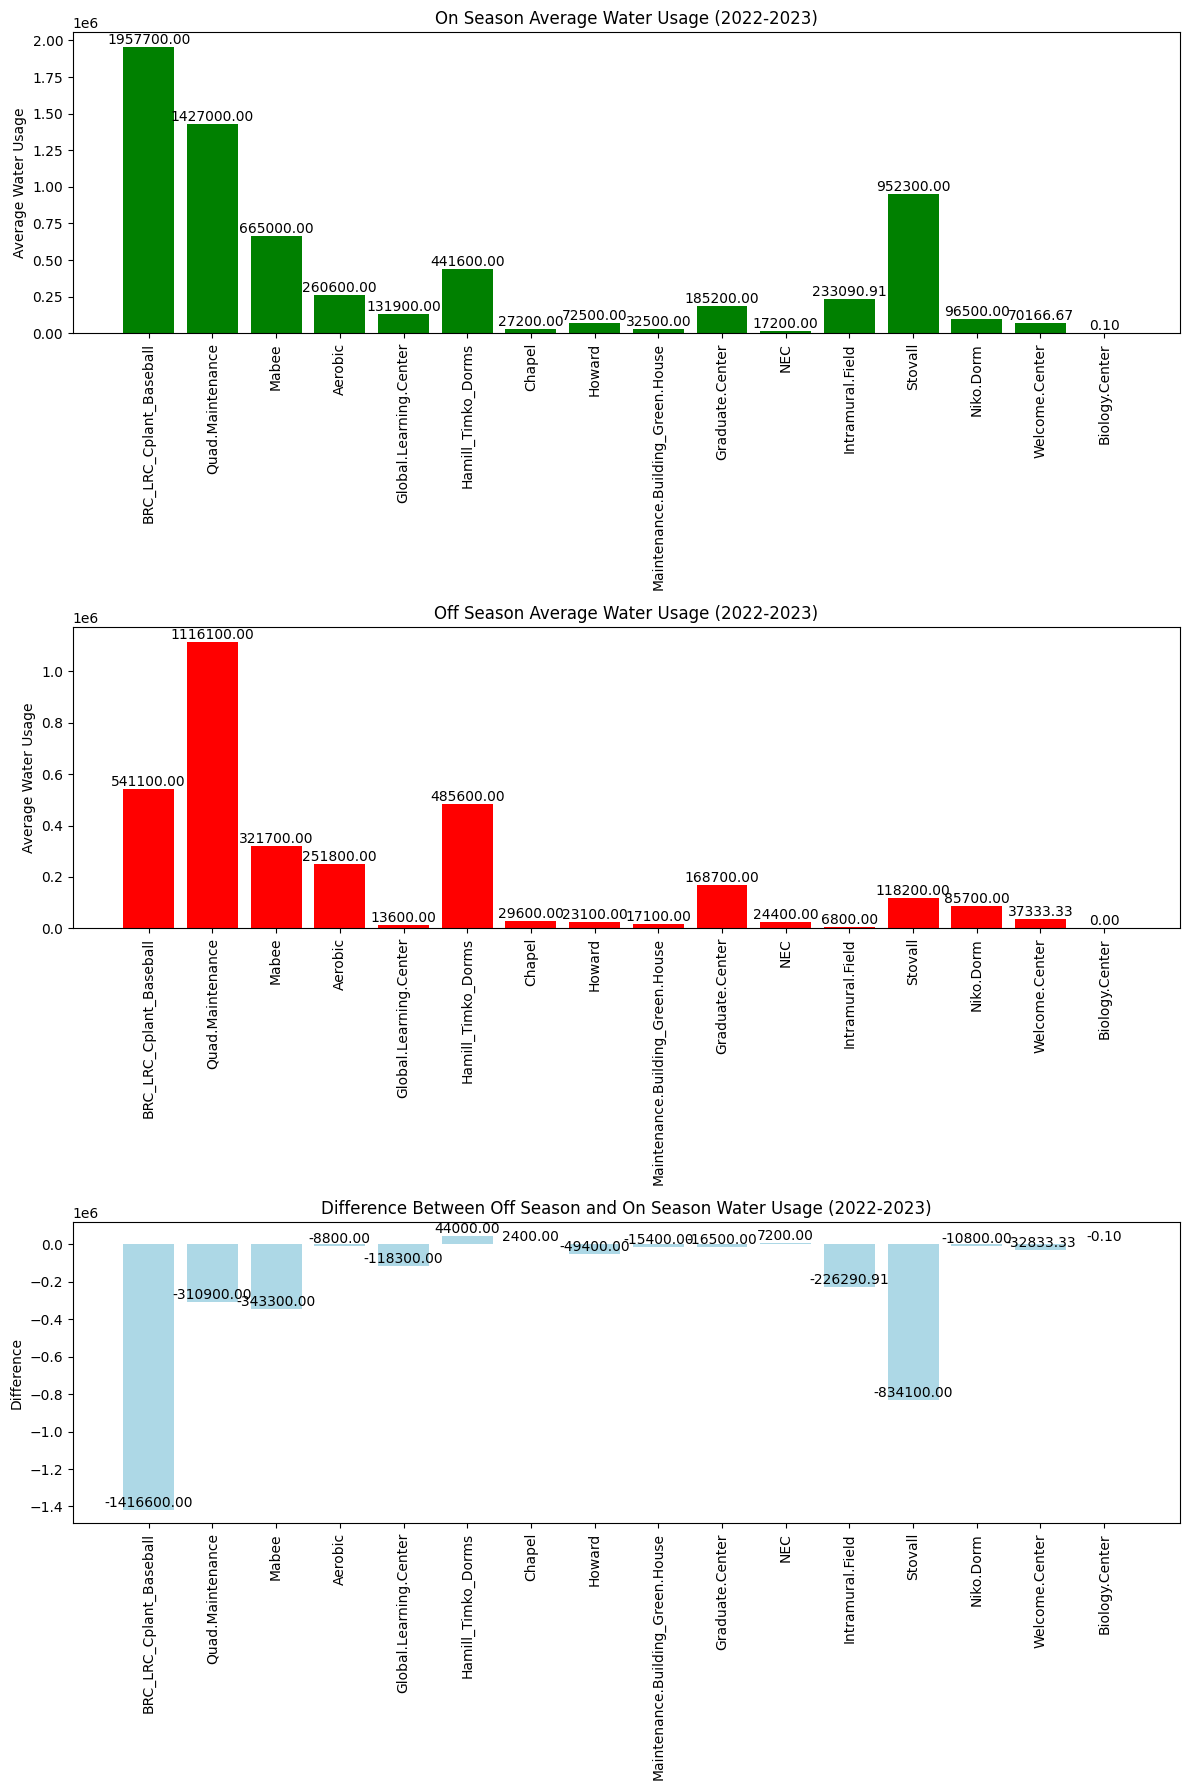

In [20]:
# Define on-season and off-season months
on_season_months = [5, 6, 7, 8, 9, 10]  # May to October
off_season_months = [11, 12, 1, 2, 3, 4]  # November to April

# Adding a 'Year' column and 'Month' column to filter data
for building, df in building_dataframes.items():
    df['Year'] = df['Date'].dt.year
    df['Month'] = df['Date'].dt.month

# Creating a dictionary to store average water usage for each building for 2022-2023
avg_water_usage_2022_2023 = {}

# Calculating the average water usage for each building for 2022-2023
for building, df in building_dataframes.items():
    if building != 'Total.Monthly.Usage':  # Exclude 'Total.Monthly.Usage'
        df_selected_years = df[df['Year'].isin([2022, 2023])]
        
        # Dynamically find the water column
        water_column = [col for col in df_selected_years.columns if 'Water' in col][0]
        
        # Calculate on-season and off-season usage
        on_season_usage = df_selected_years[df_selected_years['Month'].isin(on_season_months)][water_column].mean()
        off_season_usage = df_selected_years[df_selected_years['Month'].isin(off_season_months)][water_column].mean()
        
        avg_water_usage_2022_2023[building] = {
            'On season': on_season_usage,
            'Off season': off_season_usage
        }

# Calculate the differences between on season and off season with positive values when off season > on season
differences = {building: v['Off season'] - v['On season'] for building, v in avg_water_usage_2022_2023.items()}

# Calculate the differences between on season and off season with positive values when off season > on season
differences = {building: v['Off season'] - v['On season'] for building, v in avg_water_usage_2022_2023.items()}

# Calculate the differences between on season and off season with positive values when off season > on season
differences = {building: v['Off season'] - v['On season'] for building, v in avg_water_usage_2022_2023.items()}

# Plot the histograms and difference
fig, ax = plt.subplots(3, 1, figsize=(12, 18))

# On season histogram
on_season_avg = [v['On season'] for v in avg_water_usage_2022_2023.values()]
bars1 = ax[0].bar(avg_water_usage_2022_2023.keys(), on_season_avg, color='green')
ax[0].set_title('On Season Average Water Usage (2022-2023)')
ax[0].set_ylabel('Average Water Usage')

# Use FixedLocator and FixedFormatter for x-axis labels with rotation
ax[0].xaxis.set_major_locator(plt.FixedLocator(range(len(avg_water_usage_2022_2023))))
ax[0].set_xticklabels(avg_water_usage_2022_2023.keys(), rotation=90)

# Annotate the bars with float values
for bar, value in zip(bars1, on_season_avg):
    ax[0].text(bar.get_x() + bar.get_width() / 2, value, f'{value:.2f}', ha='center', va='bottom')

# Off season histogram
off_season_avg = [v['Off season'] for v in avg_water_usage_2022_2023.values()]
bars2 = ax[1].bar(avg_water_usage_2022_2023.keys(), off_season_avg, color='red')
ax[1].set_title('Off Season Average Water Usage (2022-2023)')
ax[1].set_ylabel('Average Water Usage')

# Use FixedLocator and FixedFormatter for x-axis labels with rotation
ax[1].xaxis.set_major_locator(plt.FixedLocator(range(len(avg_water_usage_2022_2023))))
ax[1].set_xticklabels(avg_water_usage_2022_2023.keys(), rotation=90)

# Annotate the bars with float values
for bar, value in zip(bars2, off_season_avg):
    ax[1].text(bar.get_x() + bar.get_width() / 2, value, f'{value:.2f}', ha='center', va='bottom')

# Difference histogram with positive values when off season > on season
difference_values = [differences[building] for building in avg_water_usage_2022_2023.keys()]
bars3 = ax[2].bar(avg_water_usage_2022_2023.keys(), difference_values, color='lightblue')
ax[2].set_title('Difference Between Off Season and On Season Water Usage (2022-2023)')
ax[2].set_ylabel('Difference')

# Annotate the bars with float values
for bar, value in zip(bars3, difference_values):
    ax[2].text(bar.get_x() + bar.get_width() / 2, value, f'{value:.2f}', ha='center', va='bottom')

# Use FixedLocator and FixedFormatter for x-axis labels with rotation
ax[2].xaxis.set_major_locator(plt.FixedLocator(range(len(avg_water_usage_2022_2023))))
ax[2].set_xticklabels(avg_water_usage_2022_2023.keys(), rotation=90)

plt.tight_layout()
plt.show()

##### From the above histogram there is a decrease in water usage in the 'off-season' for every meter except the following: Hamill_Timko_Dorms, NEC, Chapel


#### The end goal is to lower 'off-season' sewer usage
## Let's explore linear regression for the above meters

Data for Maintenance. Building Green.House not found.


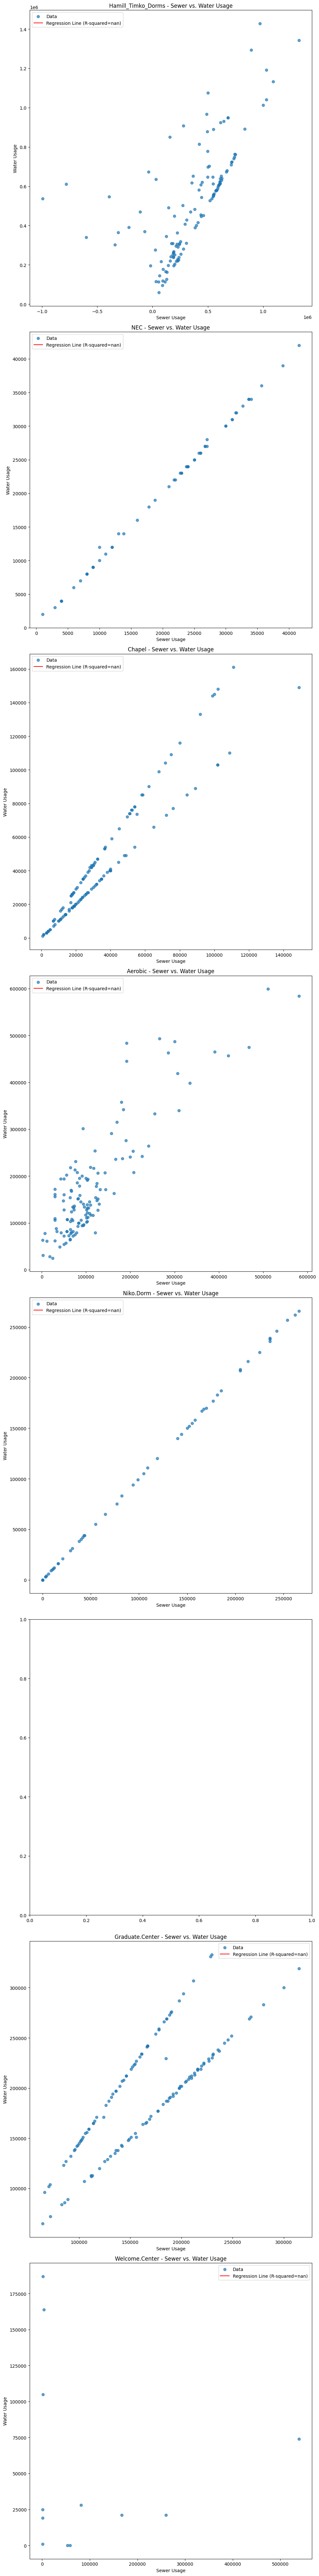

In [21]:
# Trouble buildings
buildings_to_analyze = [
    'Hamill_Timko_Dorms',
    'NEC',
    'Chapel',
    'Aerobic',
    'Niko.Dorm',
    'Maintenance. Building Green.House',
    'Graduate.Center',
    'Welcome.Center'
]

# Creating subplots for each building
fig, axes = plt.subplots(len(buildings_to_analyze), figsize=(10, 10 * len(buildings_to_analyze)))

for i, building in enumerate(buildings_to_analyze):
    # Filter data for the selected building
    df_building = building_dataframes.get(building)
    
    if df_building is None:
        print(f"Data for {building} not found.")
        continue

    # Extract sewer and water columns if they exist
    sewer_column = [col for col in df_building.columns if 'Sewer' in col]
    water_column = [col for col in df_building.columns if 'Water' in col]

    if not sewer_column or not water_column:
        print(f"Sewer or Water column not found for {building}. Skipping.")
        continue
    
    sewer_column = sewer_column[0]
    water_column = water_column[0]
    
    # Scatter plot
    axes[i].scatter(df_building[sewer_column], df_building[water_column], label='Data', alpha=0.7)
    axes[i].set_title(f'{building} - Sewer vs. Water Usage')
    axes[i].set_xlabel('Sewer Usage')
    axes[i].set_ylabel('Water Usage')
    
    # Linear regression
    slope, intercept, r_value, p_value, std_err = linregress(df_building[sewer_column], df_building[water_column])
    regression_line = slope * df_building[sewer_column] + intercept
    
    axes[i].plot(df_building[sewer_column], regression_line, color='red', label=f'Regression Line (R-squared={r_value:.2f})')
    axes[i].legend()
    
plt.tight_layout()
plt.show()

#### There is a positive relationship between water usage and sewer usage

In [22]:
print("Columns for Mabee:")
print(building_dataframes["Mabee"].columns)

print("Columns for Intramural Field:")
print(building_dataframes["Intramural.Field"].columns)

Columns for Mabee:
Index(['Date', 'Total', 'Water', 'Sewer', 'Season', 'Year', 'Month'], dtype='object', name=0)
Columns for Intramural Field:
Index(['Date', 'Water', 'water_1', 'Season', 'Year', 'Month'], dtype='object', name=0)


#### The Mabee and Intramural Field lack the sewer column, so they have been left out of the regression plots for now

### Histogram of SEWER usage for on-season vs off-season on a better scale (bar Total Usage Column)

No 'Sewer' column found for Intramural.Field. Skipping.


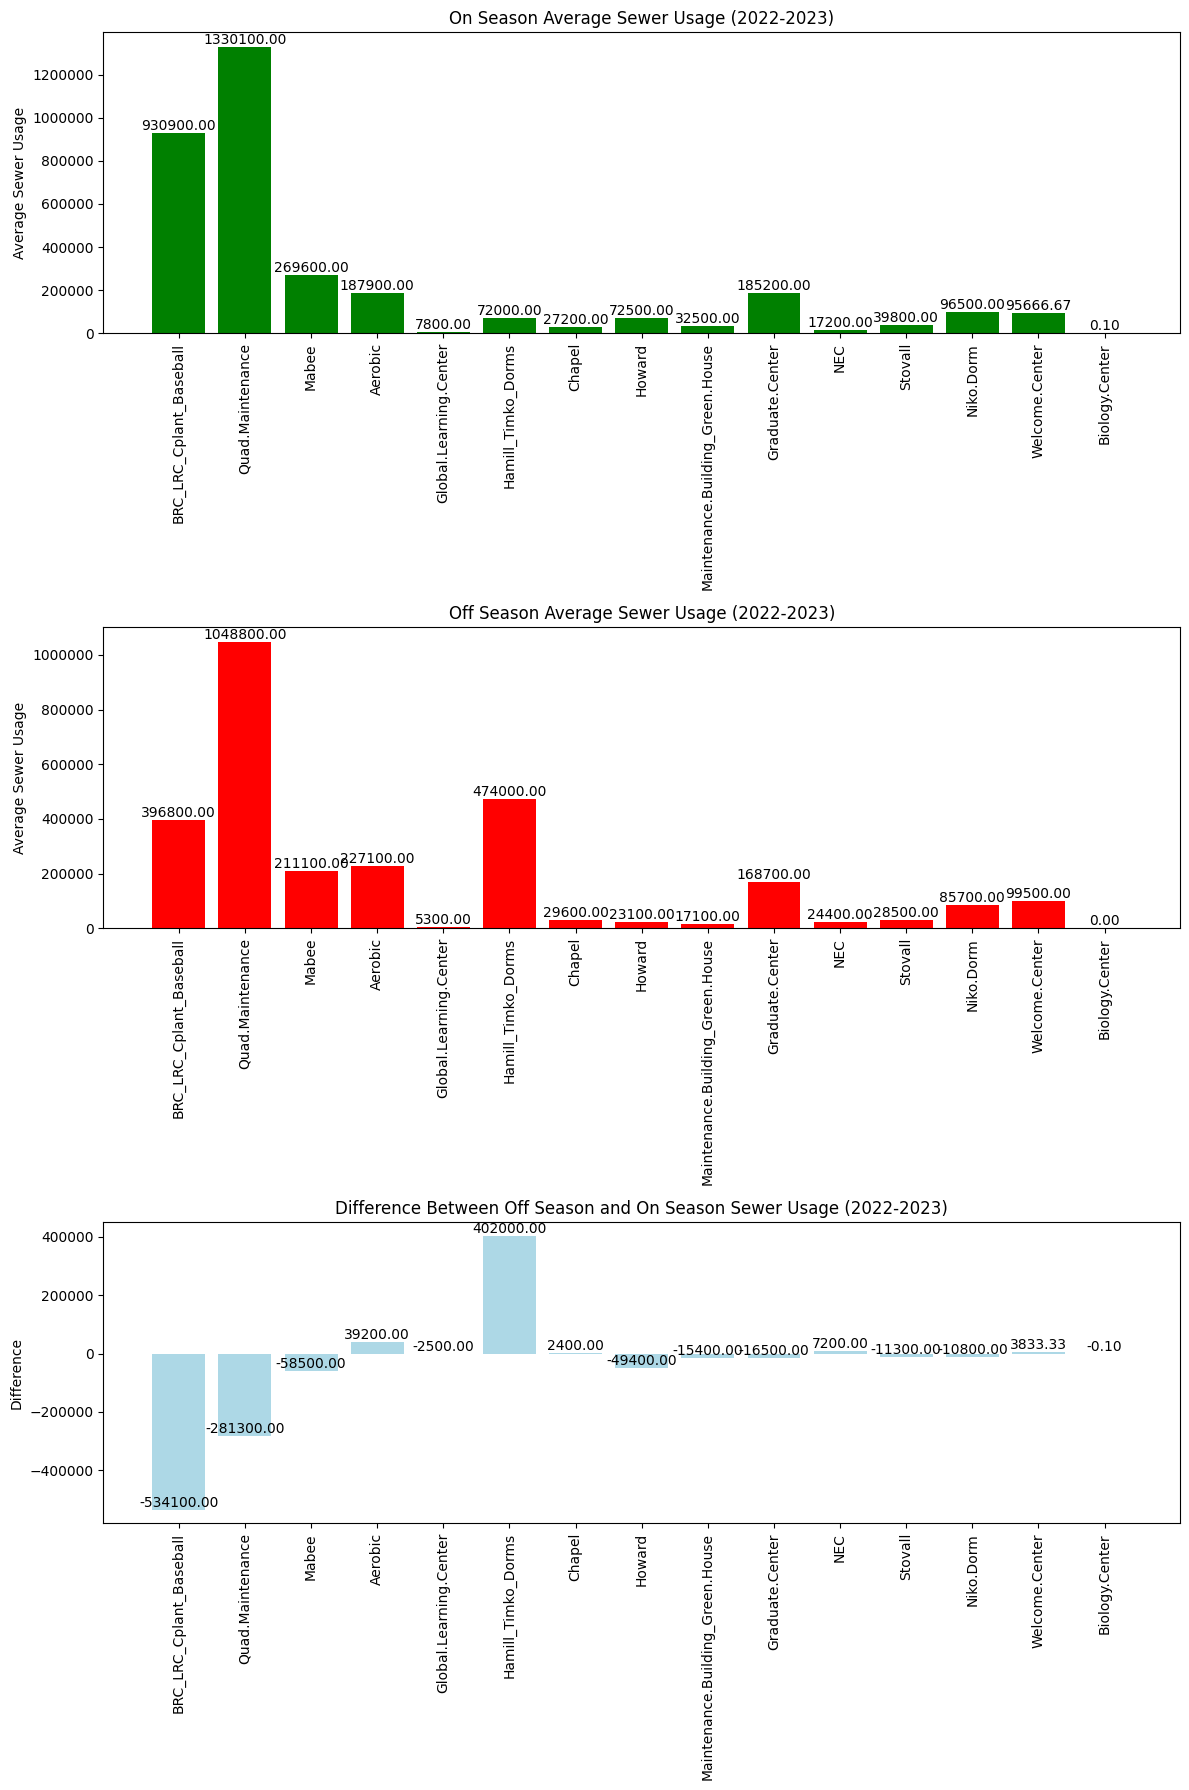

In [23]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Define on-season and off-season months
on_season_months = [5, 6, 7, 8, 9, 10]  # May to October
off_season_months = [11, 12, 1, 2, 3, 4]  # November to April

# Initialize an empty dictionary for storing average sewer usage for each building for 2022-2023
avg_sewer_usage_2022_2023 = {}

# Adding 'Month' column to the dataframes
for building, df in building_dataframes.items():
    df['Month'] = df['Date'].dt.month

# Calculating the average sewer usage for each building for 2022-2023
for building, df in building_dataframes.items():
    if building != 'Total.Monthly.Usage':  # Exclude 'Total.Monthly.Usage'
        df_selected_years = df[df['Year'].isin([2022, 2023])]
    
        # Dynamically find the sewer column if it exists
        sewer_columns = [col for col in df_selected_years.columns if 'Sewer' in col]
        if sewer_columns:
            sewer_column = sewer_columns[0]
            on_season_usage = df_selected_years[df_selected_years['Month'].isin(on_season_months)][sewer_column].mean()
            off_season_usage = df_selected_years[df_selected_years['Month'].isin(off_season_months)][sewer_column].mean()
            
            avg_sewer_usage_2022_2023[building] = {
                'On season': on_season_usage,
                'Off season': off_season_usage
            }
        else:
            print(f"No 'Sewer' column found for {building}. Skipping.")

# Calculate the differences between on season and off season sewer usage
sewer_differences_2022_2023 = {building: v['Off season'] - v['On season'] for building, v in avg_sewer_usage_2022_2023.items()}
            
# Calculate the differences between on season and off season sewer usage
sewer_differences_2022_2023 = {building: v['Off season'] - v['On season'] for building, v in avg_sewer_usage_2022_2023.items()}

# Plot the histograms and difference for sewer usage with increased space
fig, ax = plt.subplots(3, 1, figsize=(12, 18))

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.5)

# On season histogram for sewer
on_season_avg_sewer = [v['On season'] for v in avg_sewer_usage_2022_2023.values()]
bars1_sewer = ax[0].bar(avg_sewer_usage_2022_2023.keys(), on_season_avg_sewer, color='green')
ax[0].set_title('On Season Average Sewer Usage (2022-2023)')
ax[0].set_ylabel('Average Sewer Usage')

# Format y-axis as integers using FuncFormatter
ax[0].yaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x)))

# Rotate x-axis labels vertically
ax[0].tick_params(axis='x', rotation=90)

# Annotate the bars with float values for sewer
for bar, value in zip(bars1_sewer, on_season_avg_sewer):
    ax[0].text(bar.get_x() + bar.get_width() / 2, value, f'{value:.2f}', ha='center', va='bottom')

# Off season histogram for sewer
off_season_avg_sewer = [v['Off season'] for v in avg_sewer_usage_2022_2023.values()]
bars2_sewer = ax[1].bar(avg_sewer_usage_2022_2023.keys(), off_season_avg_sewer, color='red')
ax[1].set_title('Off Season Average Sewer Usage (2022-2023)')
ax[1].set_ylabel('Average Sewer Usage')

# Format y-axis as integers using FuncFormatter
ax[1].yaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x)))

# Rotate x-axis labels vertically
ax[1].tick_params(axis='x', rotation=90)

# Annotate the bars with float values for sewer
for bar, value in zip(bars2_sewer, off_season_avg_sewer):
    ax[1].text(bar.get_x() + bar.get_width() / 2, value, f'{value:.2f}', ha='center', va='bottom')

# Difference histogram for sewer usage
sewer_difference_values = [sewer_differences_2022_2023[building] for building in avg_sewer_usage_2022_2023.keys()]
bars3_sewer = ax[2].bar(avg_sewer_usage_2022_2023.keys(), sewer_difference_values, color='lightblue')
ax[2].set_title('Difference Between Off Season and On Season Sewer Usage (2022-2023)')
ax[2].set_ylabel('Difference')

# Rotate x-axis labels vertically
ax[2].tick_params(axis='x', rotation=90)

# Annotate the bars with float values for sewer
for bar, value in zip(bars3_sewer, sewer_difference_values):
    ax[2].text(bar.get_x() + bar.get_width() / 2, value, f'{value:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

### The biggest offender being the 'Hamill_Timko_Dorms'

# A closer look at the 'minor players'

No 'Sewer' column found for Intramural.Field. Skipping.


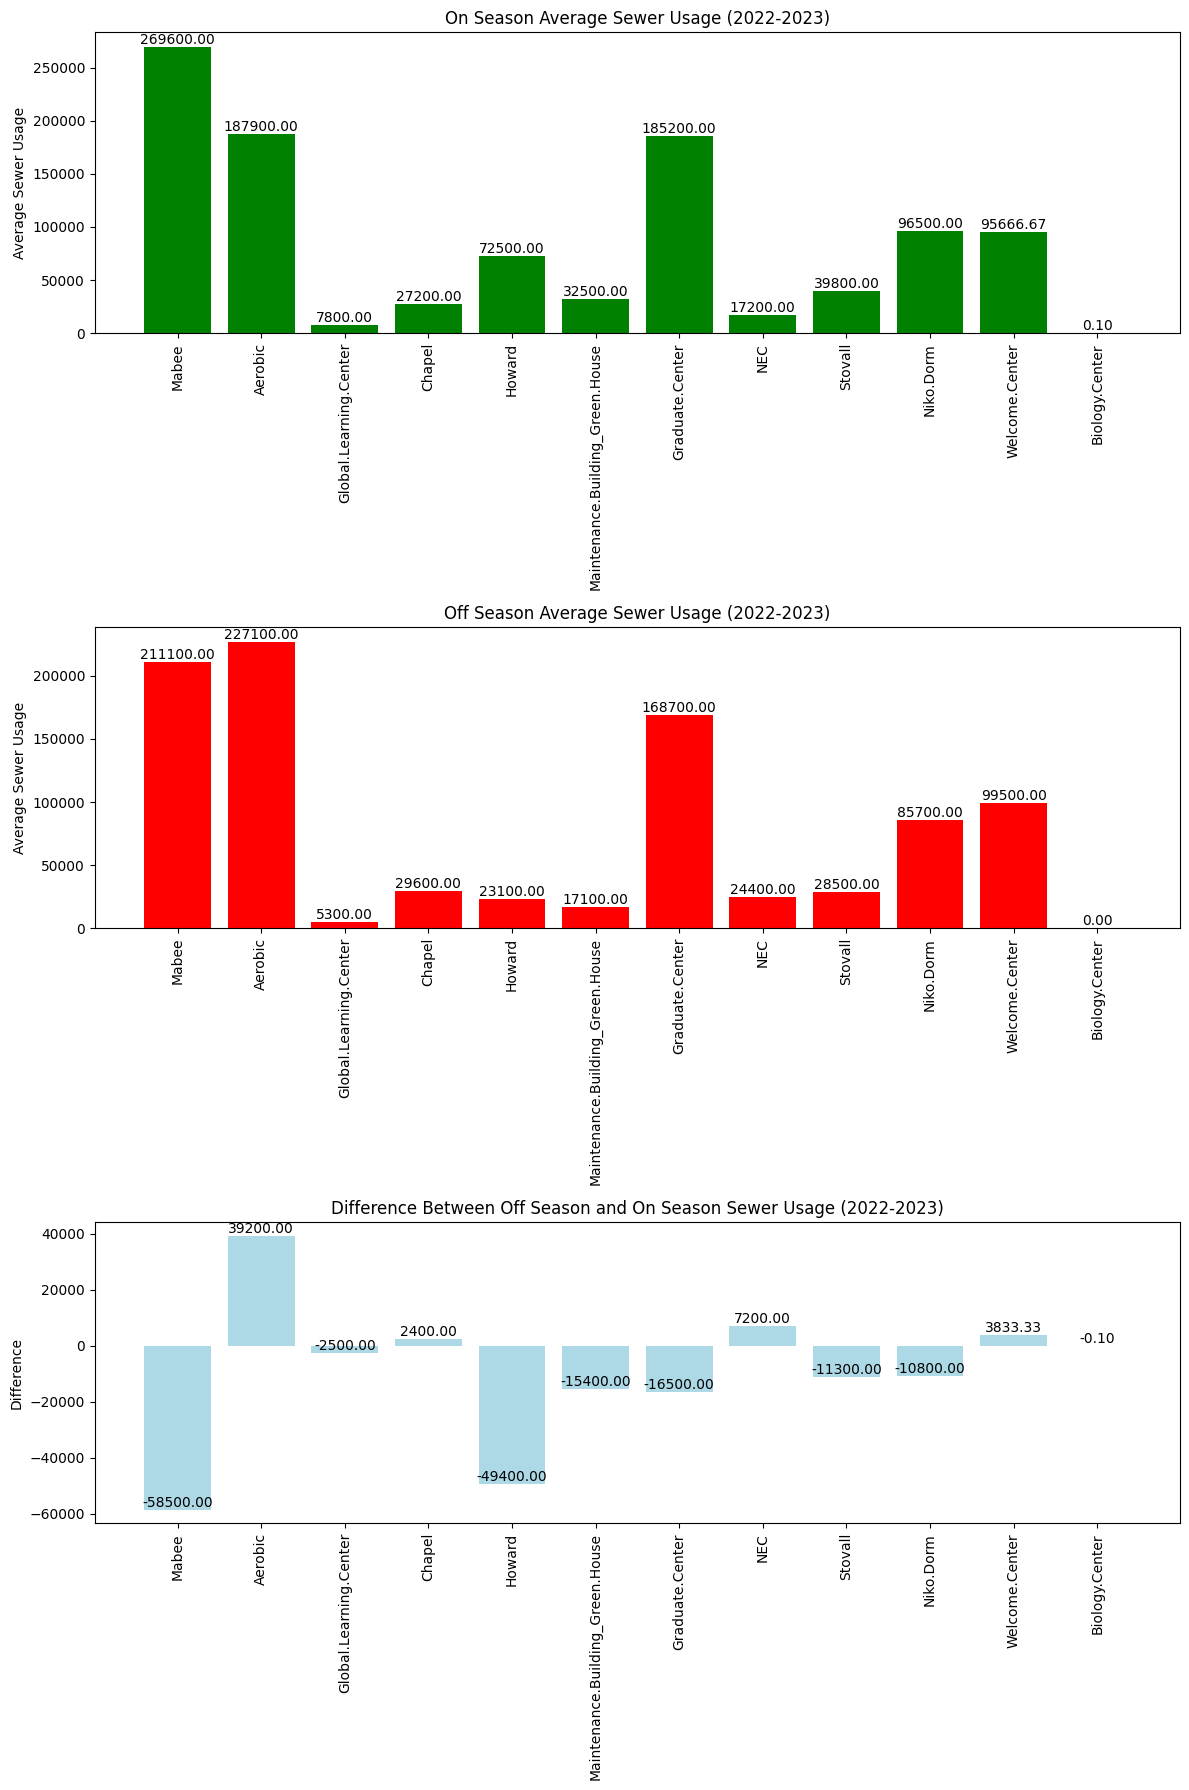

In [24]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Define on-season and off-season months
on_season_months = [5, 6, 7, 8, 9, 10]  # May to October
off_season_months = [11, 12, 1, 2, 3, 4]  # November to April

# Correct list of buildings to exclude, ensure the names match exactly
exclude_buildings = ['BRC_LRC_Cplant_Baseball', 'Quad.Maintenance', 'Hamill_Timko_Dorms']

# Initialize an empty dictionary for storing average sewer usage for each building for 2022-2023
avg_sewer_usage_2022_2023 = {}

# Adding 'Month' column to the dataframes
for building, df in building_dataframes.items():
    df['Month'] = df['Date'].dt.month

# Calculating the average sewer usage for each building for 2022-2023
for building, df in building_dataframes.items():
    if building in exclude_buildings or building == 'Total.Monthly.Usage':
        continue  # Skip the excluded buildings and 'Total.Monthly.Usage'

    df_selected_years = df[df['Year'].isin([2022, 2023])]
    
    # Dynamically find the sewer column if it exists
    sewer_columns = [col for col in df_selected_years.columns if 'Sewer' in col]
    if sewer_columns:
        sewer_column = sewer_columns[0]
        on_season_usage = df_selected_years[df_selected_years['Month'].isin(on_season_months)][sewer_column].mean()
        off_season_usage = df_selected_years[df_selected_years['Month'].isin(off_season_months)][sewer_column].mean()
            
        avg_sewer_usage_2022_2023[building] = {
            'On season': on_season_usage,
            'Off season': off_season_usage
        }
    else:
        print(f"No 'Sewer' column found for {building}. Skipping.")

# Calculate the differences between on season and off season sewer usage
# This time we are considering the exclusion within the plotting data preparation
sewer_differences_2022_2023 = {building: v['Off season'] - v['On season'] for building, v in avg_sewer_usage_2022_2023.items() if building not in exclude_buildings}

# Plot the histograms and difference for sewer usage with increased space
fig, ax = plt.subplots(3, 1, figsize=(12, 18))

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.5)

# Prepare the data for on season histogram excluding the unwanted buildings
on_season_data = {building: v for building, v in avg_sewer_usage_2022_2023.items() if building not in exclude_buildings}
on_season_avg_sewer = [v['On season'] for v in on_season_data.values()]
ax[0].bar(on_season_data.keys(), on_season_avg_sewer, color='green')
ax[0].set_title('On Season Average Sewer Usage (2022-2023)')
ax[0].set_ylabel('Average Sewer Usage')
ax[0].yaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x)))
ax[0].tick_params(axis='x', rotation=90)
for bar, value in zip(ax[0].containers[0], on_season_avg_sewer):
    ax[0].text(bar.get_x() + bar.get_width() / 2, value, f'{value:.2f}', ha='center', va='bottom')

# Prepare the data for off season histogram excluding the unwanted buildings
off_season_data = {building: v for building, v in avg_sewer_usage_2022_2023.items() if building not in exclude_buildings}
off_season_avg_sewer = [v['Off season'] for v in off_season_data.values()]
ax[1].bar(off_season_data.keys(), off_season_avg_sewer, color='red')
ax[1].set_title('Off Season Average Sewer Usage (2022-2023)')
ax[1].set_ylabel('Average Sewer Usage')
ax[1].yaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x)))
ax[1].tick_params(axis='x', rotation=90)
for bar, value in zip(ax[1].containers[0], off_season_avg_sewer):
    ax[1].text(bar.get_x() + bar.get_width() / 2, value, f'{value:.2f}', ha='center', va='bottom')

# Prepare the data for the difference histogram excluding the unwanted buildings
difference_data = {building: v for building, v in sewer_differences_2022_2023.items() if building not in exclude_buildings}
difference_values = [v for v in difference_data.values()]
ax[2].bar(difference_data.keys(), difference_values, color='lightblue')
ax[2].set_title('Difference Between Off Season and On Season Sewer Usage (2022-2023)')
ax[2].set_ylabel('Difference')
ax[2].tick_params(axis='x', rotation=90)
for bar, value in zip(ax[2].containers[0], difference_values):
    ax[2].text(bar.get_x() + bar.get_width() / 2, value, f'{value:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

### So far the trouble areas of use are:
#### - Hamill_Timko_Dorms
#### - Aerobic
#### - NEC
#### - Welcome.Center
#### - Chapel
#### And these don't fare very well: "Global.Learning.Center, Niko.Dorm, Stovall, Maintenance.Building_Green.House, Graduate Center"


In [25]:
print("Columns for Hamill_Timko_Dorms:")
print(building_dataframes["Hamill_Timko_Dorms"].columns)

Columns for Hamill_Timko_Dorms:
Index(['Date', 'Water', 'Sewer', 'Sewer Charge', 'Season', 'Year', 'Month'], dtype='object', name=0)


### Histogram of the biggest "trouble-maker" Hamill_Timko_Dorms Sewer Usage Overtime

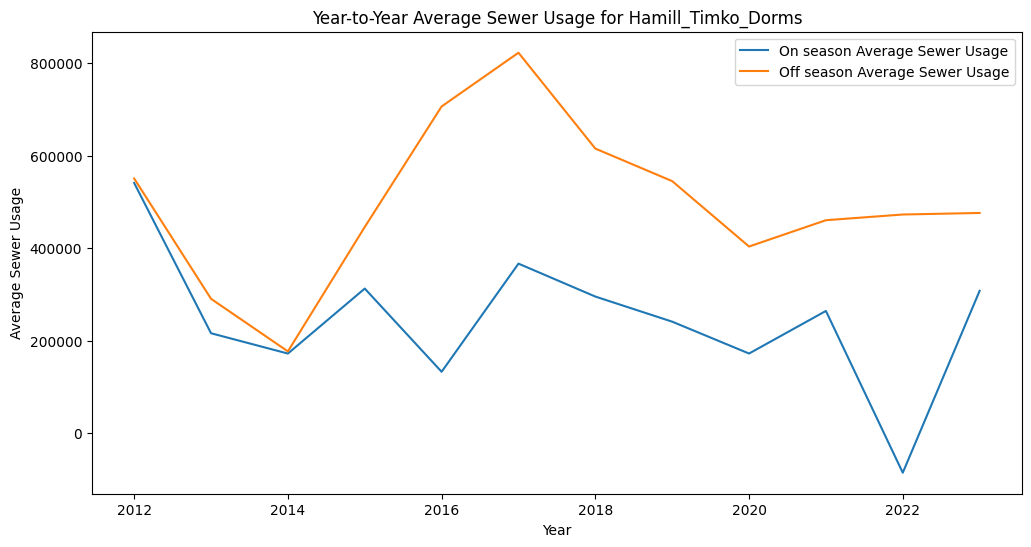

In [26]:
# Filter data for the building 'Hamill_Timko_Dorms'
df_building = building_dataframes.get('Hamill_Timko_Dorms', pd.DataFrame())

# Group by 'Year' and 'Season', then calculate the mean
df_grouped = df_building.groupby(['Year', 'Season']).mean().reset_index()

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))
for season in ['On season', 'Off season']:
    df_season = df_grouped[df_grouped['Season'] == season]
    ax.plot(df_season['Year'], df_season['Sewer'], label=f"{season} Average Sewer Usage")

# Labels
ax.set_title('Year-to-Year Average Sewer Usage for Hamill_Timko_Dorms')
ax.set_xlabel('Year')
ax.set_ylabel('Average Sewer Usage')
ax.legend()

# Format y-axis as integers using FuncFormatter
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x)))

plt.show()

#### Interesting to note that up until 2016, our main goal of off-season sewer usage < on-season sewer usage was present it was almost true again in 2017

### Histogram of the Aerobic Center Sewer Usage Over Time

In [20]:
print("Columns for Aerobic:")
print(building_dataframes["Aerobic"].columns)

Columns for Aerobic:
Index(['Date', 'Water', 'Sewer', 'Sewer Charge', 'Season', 'Year', 'Month'], dtype='object', name=0)


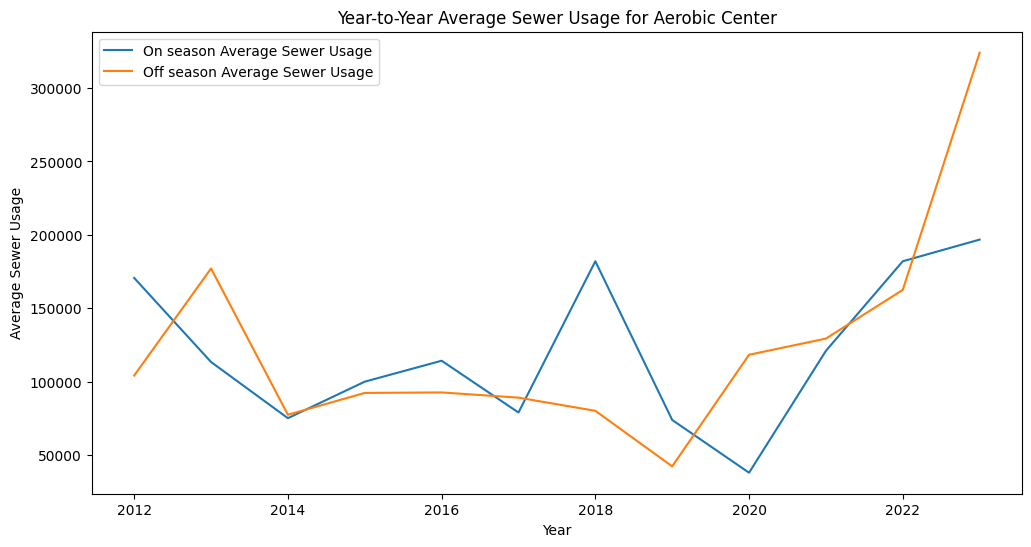

In [27]:
# Filter data for the building 'Aerobic'
df_building = building_dataframes.get('Aerobic', pd.DataFrame())

# Group by 'Year' and 'Season', then calculate the mean
df_grouped = df_building.groupby(['Year', 'Season']).mean().reset_index()

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))
for season in ['On season', 'Off season']:
    df_season = df_grouped[df_grouped['Season'] == season]
    ax.plot(df_season['Year'], df_season['Sewer'], label=f"{season} Average Sewer Usage")

# Labels
ax.set_title('Year-to-Year Average Sewer Usage for Aerobic Center')
ax.set_xlabel('Year')
ax.set_ylabel('Average Sewer Usage')
ax.legend()

# Format y-axis as integers using FuncFormatter
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x)))

plt.show()

### Histogram of the NEC Sewer Usage Over Time

In [28]:
print("Columns for NEC:")
print(building_dataframes["NEC"].columns)

Columns for NEC:
Index(['Date', 'Water', 'Sewer', 'Lawn Spr', 'Season', 'Year', 'Month'], dtype='object', name=0)


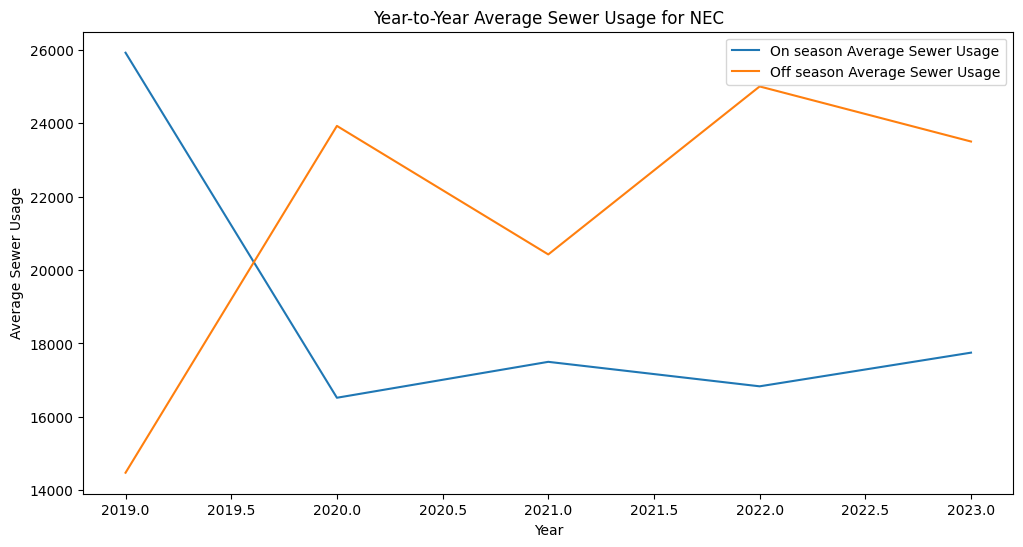

In [29]:
# Filter data for the building 'NEC'
df_building = building_dataframes.get('NEC', pd.DataFrame())

# Group by 'Year' and 'Season', then calculate the mean
df_grouped = df_building.groupby(['Year', 'Season']).mean().reset_index()

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))
for season in ['On season', 'Off season']:
    df_season = df_grouped[df_grouped['Season'] == season]
    ax.plot(df_season['Year'], df_season['Sewer'], label=f"{season} Average Sewer Usage")

# Labels
ax.set_title('Year-to-Year Average Sewer Usage for NEC')
ax.set_xlabel('Year')
ax.set_ylabel('Average Sewer Usage')
ax.legend()

# Format y-axis as integers using FuncFormatter
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x)))

plt.show()

### Histogram of the Welcome.Center Sewer Usage Over Time

In [30]:
print("Columns for Welcome.Center:")
print(building_dataframes["Welcome.Center"].columns)

Columns for Welcome.Center:
Index(['Date', 'WC Water', 'Lawn/Hands ', 'Fire Line Water 8"',
       'MAC & Lib Water 4"', 'Water 2" ', 'Lib Water 2" Lawn',
       'MAC Water 2" Lawn', 'Sewer', 'Season', 'Year', 'Month'],
      dtype='object', name=0)


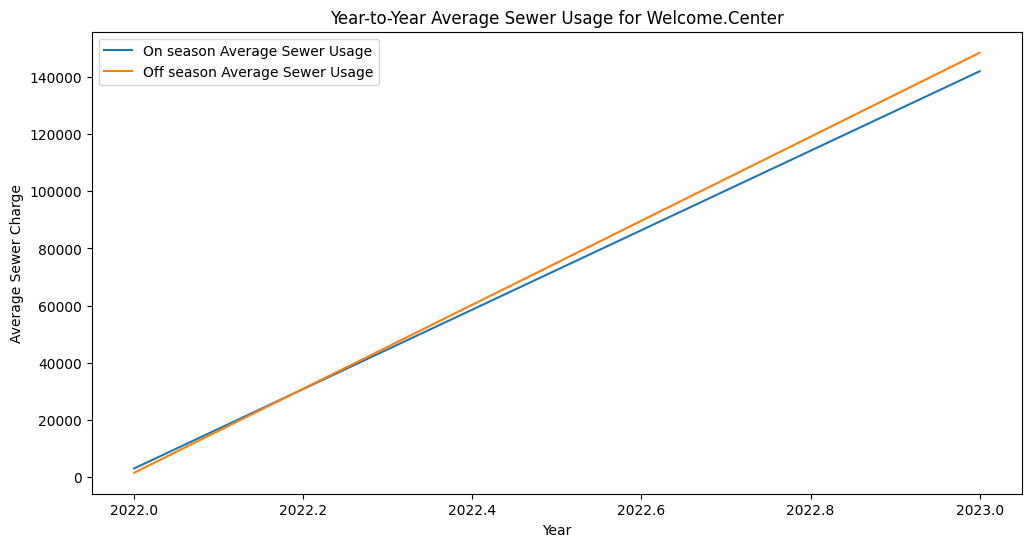

In [31]:
# Filter data for the building 'Welcome.Center'
df_building = building_dataframes.get('Welcome.Center', pd.DataFrame())

# Group by 'Year' and 'Season', then calculate the mean
df_grouped = df_building.groupby(['Year', 'Season']).mean().reset_index()

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))
for season in ['On season', 'Off season']:
    df_season = df_grouped[df_grouped['Season'] == season]
    ax.plot(df_season['Year'], df_season['Sewer'], label=f"{season} Average Sewer Usage")

# Labels
ax.set_title('Year-to-Year Average Sewer Usage for Welcome.Center')
ax.set_xlabel('Year')
ax.set_ylabel('Average Sewer Charge')
ax.legend()

# Format y-axis as integers using FuncFormatter
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x)))

plt.show()

### Histogram of the Chapel Sewer Usage Over Time

In [32]:
print("Columns for Chapel:")
print(building_dataframes["Chapel"].columns)

Columns for Chapel:
Index(['Date', 'Water', 'Sewer', '%', 'Season', 'Year', 'Month'], dtype='object', name=0)


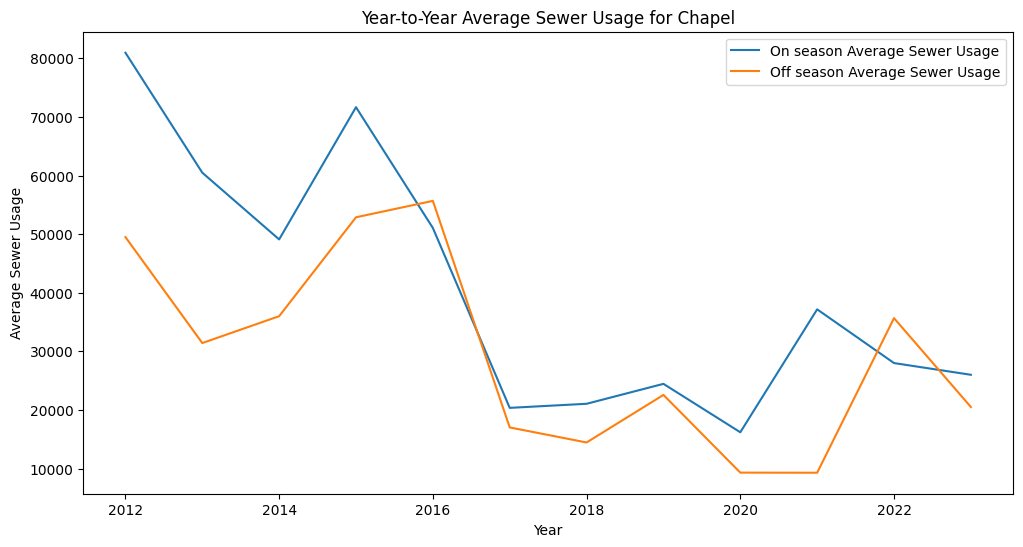

In [33]:
# Filter data for the building 'Chapel'
df_building = building_dataframes.get('Chapel', pd.DataFrame())

# Group by 'Year' and 'Season', then calculate the mean
df_grouped = df_building.groupby(['Year', 'Season']).mean().reset_index()

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))
for season in ['On season', 'Off season']:
    df_season = df_grouped[df_grouped['Season'] == season]
    ax.plot(df_season['Year'], df_season['Sewer'], label=f"{season} Average Sewer Usage")

# Labels
ax.set_title('Year-to-Year Average Sewer Usage for Chapel')
ax.set_xlabel('Year')
ax.set_ylabel('Average Sewer Usage')
ax.legend()

# Format y-axis as integers using FuncFormatter
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x)))

plt.show()

### Histogram of Total Monthly Usage

In [34]:
print("Columns for Total.Monthly.Usage:")
print(building_dataframes["Total.Monthly.Usage"])

Columns for Total.Monthly.Usage:
0         Date  Water Usage  Sewer Usage  Sewer%  Annual %       Season  \
0   2023-09-12         0.00         0.00     NaN        NaN   On season   
1   2023-08-12   7533000.00   3976000.00    0.53        NaN   On season   
2   2023-07-12   5967000.00   3724000.00    0.62        NaN   On season   
3   2023-06-12   5170000.00   3310000.00    0.64        NaN   On season   
4   2023-05-12   5165000.00   3218000.00    0.62        NaN   On season   
..         ...          ...          ...     ...        ...         ...   
130 2012-11-15   7467000.00   5587360.00    0.75        NaN  Off season   
131 2012-10-12  10581000.00   7635210.00    0.72        NaN   On season   
132 2012-09-15   9629000.00   6373950.00    0.66        NaN   On season   
133 2012-08-15  10257000.00   7444410.00    0.73        NaN   On season   
134        NaT          NaN          NaN     NaN        NaN   On season   

0      Year  Month  
0   2023.00   9.00  
1   2023.00   8.00  
2  

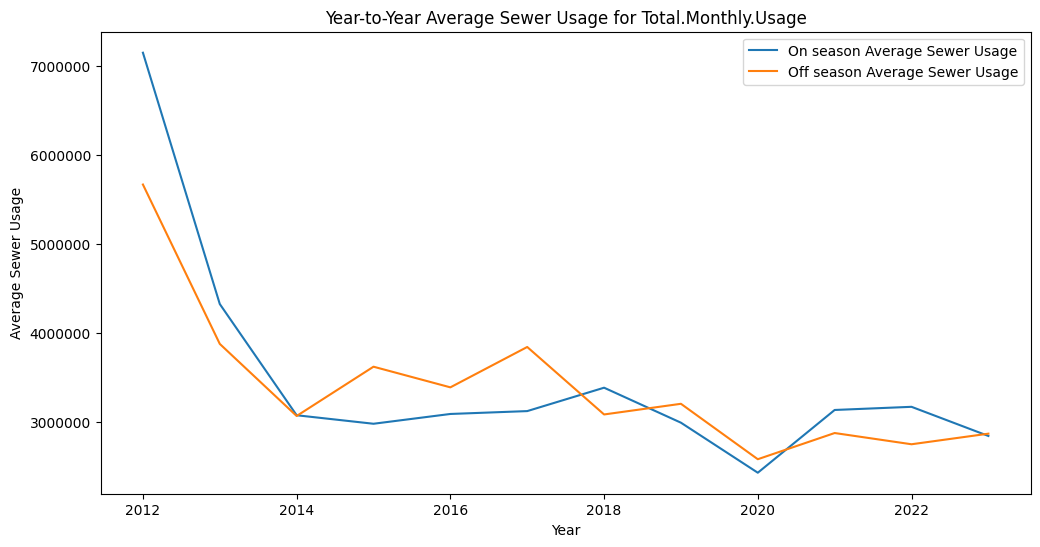

In [35]:
# Filter data for the building 'Total.Monthly.Usage'
df_building = building_dataframes.get('Total.Monthly.Usage', pd.DataFrame())

# Group by 'Year' and 'Season', then calculate the mean
df_grouped = df_building.groupby(['Year', 'Season']).mean().reset_index()

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))
for season in ['On season', 'Off season']:
    df_season = df_grouped[df_grouped['Season'] == season]
    ax.plot(df_season['Year'], df_season['Sewer Usage'], label=f"{season} Average Sewer Usage")

# Labels
ax.set_title('Year-to-Year Average Sewer Usage for Total.Monthly.Usage')
ax.set_xlabel('Year')
ax.set_ylabel('Average Sewer Usage')
ax.legend()

# Format y-axis as integers using FuncFormatter
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x)))

plt.show()

In [36]:
print(building_dataframes['Total.Monthly.Usage'])

0         Date  Water Usage  Sewer Usage  Sewer%  Annual %       Season  \
0   2023-09-12         0.00         0.00     NaN        NaN   On season   
1   2023-08-12   7533000.00   3976000.00    0.53        NaN   On season   
2   2023-07-12   5967000.00   3724000.00    0.62        NaN   On season   
3   2023-06-12   5170000.00   3310000.00    0.64        NaN   On season   
4   2023-05-12   5165000.00   3218000.00    0.62        NaN   On season   
..         ...          ...          ...     ...        ...         ...   
130 2012-11-15   7467000.00   5587360.00    0.75        NaN  Off season   
131 2012-10-12  10581000.00   7635210.00    0.72        NaN   On season   
132 2012-09-15   9629000.00   6373950.00    0.66        NaN   On season   
133 2012-08-15  10257000.00   7444410.00    0.73        NaN   On season   
134        NaT          NaN          NaN     NaN        NaN   On season   

0      Year  Month  
0   2023.00   9.00  
1   2023.00   8.00  
2   2023.00   7.00  
3   2023.00   6

### Histogram of off-season Total Monthly Usage vs BRC_LRC_Cplant_Baseball

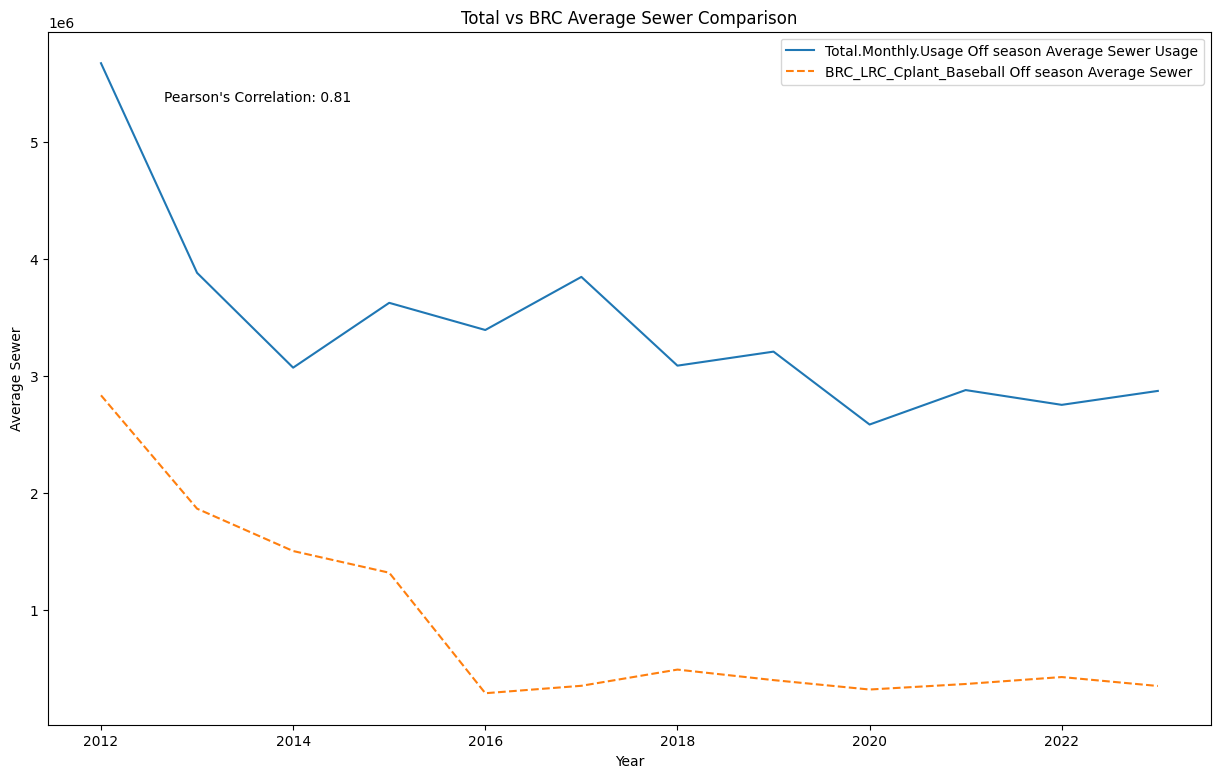

In [37]:
from scipy.stats import pearsonr

# Filter data for the building 'Total.Monthly.Usage'
df_building = building_dataframes.get('Total.Monthly.Usage', pd.DataFrame())

# Group by 'Year' and 'Season', then calculate the mean
df_grouped = df_building.groupby(['Year', 'Season']).mean().reset_index()

# Filter data for the building 'BRC_LRC_Cplant_Baseball'
df_building_b = building_dataframes.get('BRC_LRC_Cplant_Baseball', pd.DataFrame())

# Group by 'Year' and 'Season', then calculate the mean
df_grouped_b = df_building_b.groupby(['Year', 'Season']).mean().reset_index()


# Create the plot
fig, ax = plt.subplots(figsize=(15, 9))

for season in ['Off season']:
    df_season_total = df_grouped[df_grouped['Season'] == season]
    df_season_brc = df_grouped_b[df_grouped_b['Season'] == season]
    
    ax.plot(df_season_total['Year'], df_season_total['Sewer Usage'], label=f"Total.Monthly.Usage {season} Average Sewer Usage")
    ax.plot(df_season_brc['Year'], df_season_brc['Sewer'], label=f"BRC_LRC_Cplant_Baseball {season} Average Sewer", linestyle='--')
    
    # Calculate Pearson's correlation coefficient
    common_years = set(df_season_total['Year']) & set(df_season_brc['Year'])
    corr_data_total = df_season_total[df_season_total['Year'].isin(common_years)]['Sewer Usage']
    corr_data_brc = df_season_brc[df_season_brc['Year'].isin(common_years)]['Sewer']
    corr_coefficient, _ = pearsonr(corr_data_total, corr_data_brc)
    
    # Display the correlation coefficient on the plot
    ax.text(0.1, 0.9, f"Pearson's Correlation: {corr_coefficient:.2f}", transform=ax.transAxes)

# Add labels and title
ax.set_title('Total vs BRC Average Sewer Comparison')
ax.set_xlabel('Year')
ax.set_ylabel('Average Sewer')
ax.legend()

# Show the plot
plt.show()

### Histogram of off-season Total Monthly Usage vs Mabee

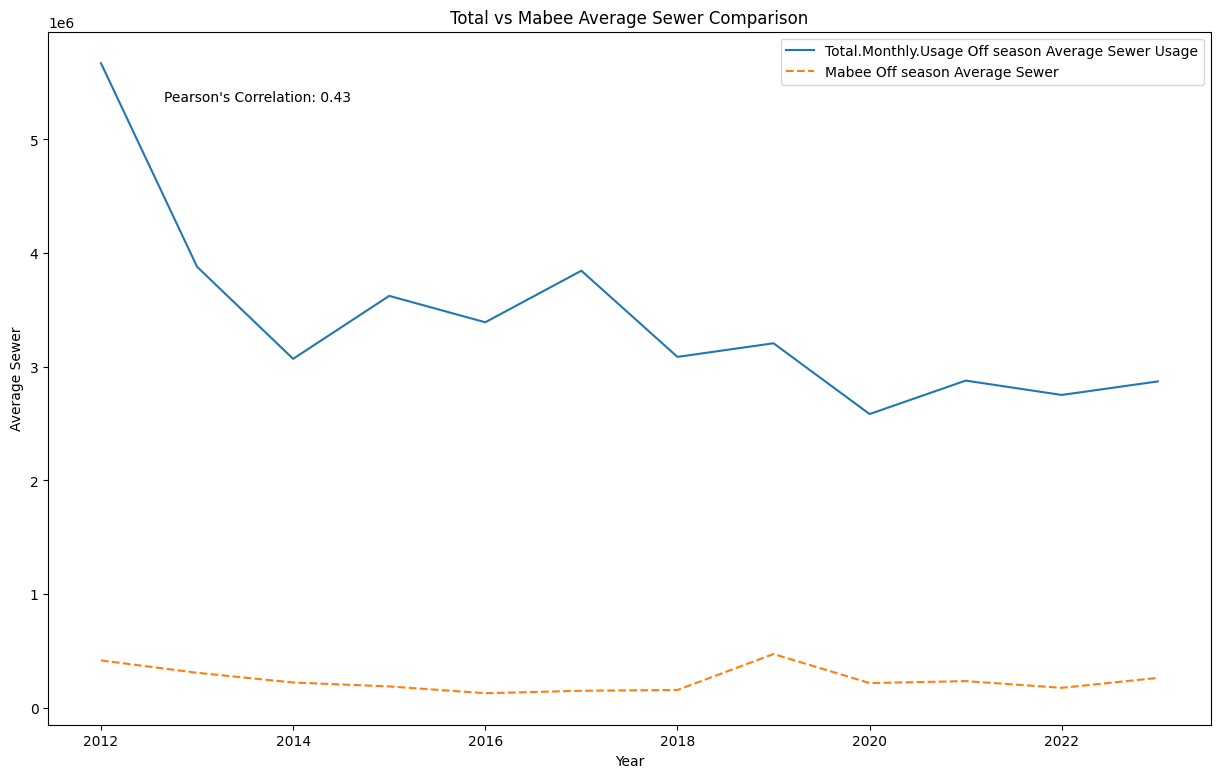

In [38]:
from scipy.stats import pearsonr

# Filter data for the building 'Total.Monthly.Usage'
df_building = building_dataframes.get('Total.Monthly.Usage', pd.DataFrame())

# Group by 'Year' and 'Season', then calculate the mean
df_grouped = df_building.groupby(['Year', 'Season']).mean().reset_index()

# Filter data for the building 'Mabee'
df_building_b = building_dataframes.get('Mabee', pd.DataFrame())

# Group by 'Year' and 'Season', then calculate the mean
df_grouped_b = df_building_b.groupby(['Year', 'Season']).mean().reset_index()


# Create the plot
fig, ax = plt.subplots(figsize=(15, 9))

for season in ['Off season']:
    df_season_total = df_grouped[df_grouped['Season'] == season]
    df_season_brc = df_grouped_b[df_grouped_b['Season'] == season]
    
    ax.plot(df_season_total['Year'], df_season_total['Sewer Usage'], label=f"Total.Monthly.Usage {season} Average Sewer Usage")
    ax.plot(df_season_brc['Year'], df_season_brc['Sewer'], label=f"Mabee {season} Average Sewer", linestyle='--')
    
    # Calculate Pearson's correlation coefficient
    common_years = set(df_season_total['Year']) & set(df_season_brc['Year'])
    corr_data_total = df_season_total[df_season_total['Year'].isin(common_years)]['Sewer Usage']
    corr_data_brc = df_season_brc[df_season_brc['Year'].isin(common_years)]['Sewer']
    corr_coefficient, _ = pearsonr(corr_data_total, corr_data_brc)
    
    # Display the correlation coefficient on the plot
    ax.text(0.1, 0.9, f"Pearson's Correlation: {corr_coefficient:.2f}", transform=ax.transAxes)

# Add labels and title
ax.set_title('Total vs Mabee Average Sewer Comparison')
ax.set_xlabel('Year')
ax.set_ylabel('Average Sewer')
ax.legend()

# Show the plot
plt.show()

### Histogram of off-season Total Monthly Usage vs Global.Learning.Center

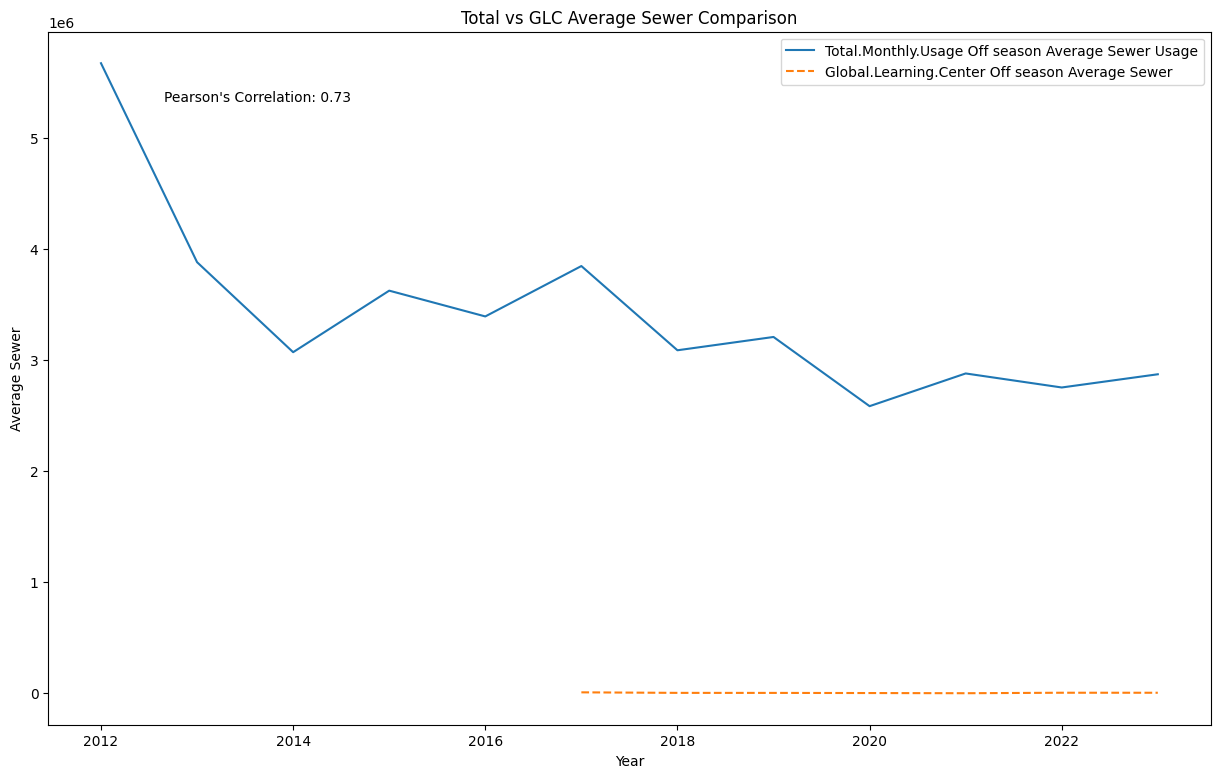

In [39]:
from scipy.stats import pearsonr

# Filter data for the building 'Total.Monthly.Usage'
df_building = building_dataframes.get('Total.Monthly.Usage', pd.DataFrame())

# Group by 'Year' and 'Season', then calculate the mean
df_grouped = df_building.groupby(['Year', 'Season']).mean().reset_index()

# Filter data for the building 'Global.Learning.Center'
df_building_b = building_dataframes.get('Global.Learning.Center', pd.DataFrame())

# Group by 'Year' and 'Season', then calculate the mean
df_grouped_b = df_building_b.groupby(['Year', 'Season']).mean().reset_index()


# Create the plot
fig, ax = plt.subplots(figsize=(15, 9))

for season in ['Off season']:
    df_season_total = df_grouped[df_grouped['Season'] == season]
    df_season_brc = df_grouped_b[df_grouped_b['Season'] == season]
    
    ax.plot(df_season_total['Year'], df_season_total['Sewer Usage'], label=f"Total.Monthly.Usage {season} Average Sewer Usage")
    ax.plot(df_season_brc['Year'], df_season_brc['Sewer'], label=f"Global.Learning.Center {season} Average Sewer", linestyle='--')
    
    # Calculate Pearson's correlation coefficient
    common_years = set(df_season_total['Year']) & set(df_season_brc['Year'])
    corr_data_total = df_season_total[df_season_total['Year'].isin(common_years)]['Sewer Usage'].dropna()
    corr_data_brc = df_season_brc[df_season_brc['Year'].isin(common_years)]['Sewer'].dropna()
    
    # Find common years after dropping NaNs
    common_years_after_drop = set(corr_data_total.index) & set(corr_data_brc.index)
    
    # Filter the data again based on the common years
    corr_data_total = corr_data_total[corr_data_total.index.isin(common_years_after_drop)]
    corr_data_brc = corr_data_brc[corr_data_brc.index.isin(common_years_after_drop)]
    
    # Ensure both arrays have the same length after dropping NaNs
    if len(corr_data_total) == len(corr_data_brc):
        corr_coefficient, _ = pearsonr(corr_data_total, corr_data_brc)
        ax.text(0.1, 0.9, f"Pearson's Correlation: {corr_coefficient:.2f}", transform=ax.transAxes)
    else:
        ax.text(0.1, 0.9, "Could not compute Pearson's Correlation: Length mismatch after dropping NaNs", transform=ax.transAxes)

# Add labels and title
ax.set_title('Total vs GLC Average Sewer Comparison')
ax.set_xlabel('Year')
ax.set_ylabel('Average Sewer')
ax.legend()

# Show the plot
plt.show()

### Histogram of off-season Total Monthly Usage vs Maintenance.Building_Green.House

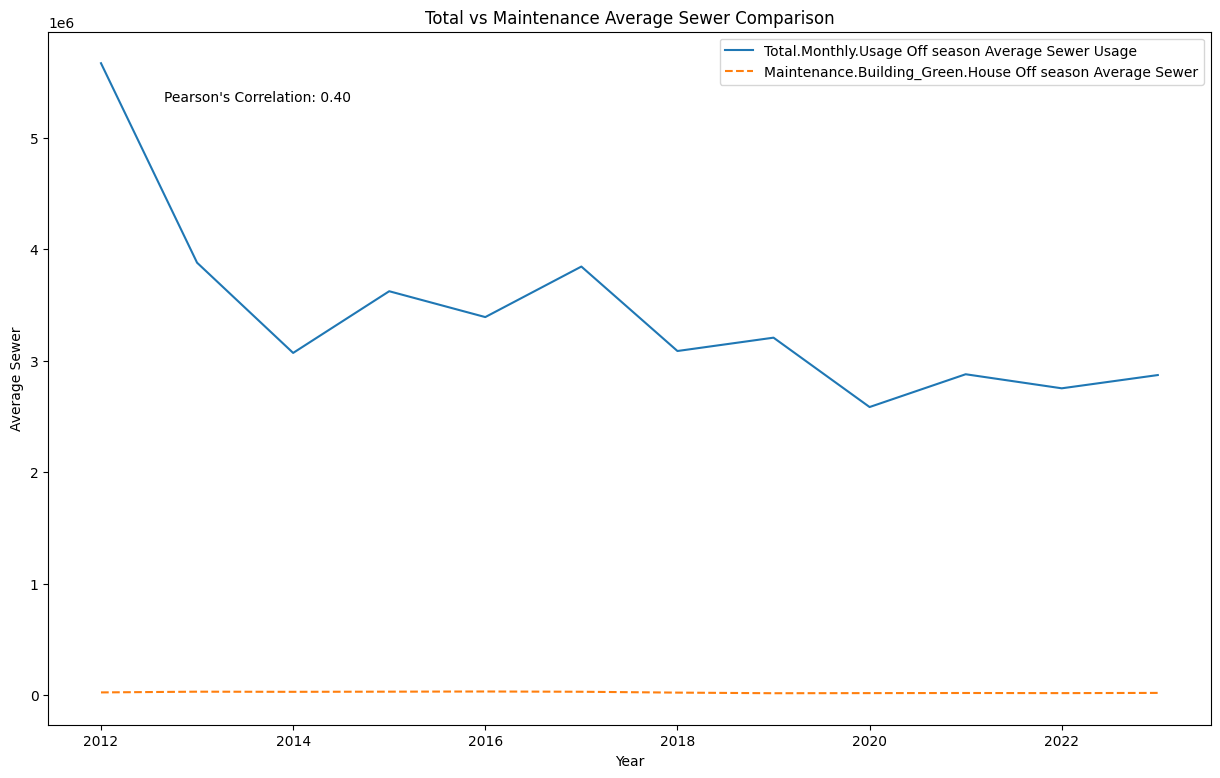

In [40]:
from scipy.stats import pearsonr

# Filter data for the building 'Total.Monthly.Usage'
df_building = building_dataframes.get('Total.Monthly.Usage', pd.DataFrame())

# Group by 'Year' and 'Season', then calculate the mean
df_grouped = df_building.groupby(['Year', 'Season']).mean().reset_index()

# Filter data for the building 'Maintenance.Building_Green.House'
df_building_b = building_dataframes.get('Maintenance.Building_Green.House', pd.DataFrame())

# Group by 'Year' and 'Season', then calculate the mean
df_grouped_b = df_building_b.groupby(['Year', 'Season']).mean().reset_index()


# Create the plot
fig, ax = plt.subplots(figsize=(15, 9))

for season in ['Off season']:
    df_season_total = df_grouped[df_grouped['Season'] == season]
    df_season_brc = df_grouped_b[df_grouped_b['Season'] == season]
    
    ax.plot(df_season_total['Year'], df_season_total['Sewer Usage'], label=f"Total.Monthly.Usage {season} Average Sewer Usage")
    ax.plot(df_season_brc['Year'], df_season_brc['Sewer'], label=f"Maintenance.Building_Green.House {season} Average Sewer", linestyle='--')
    
    # Calculate Pearson's correlation coefficient
    common_years = set(df_season_total['Year']) & set(df_season_brc['Year'])
    corr_data_total = df_season_total[df_season_total['Year'].isin(common_years)]['Sewer Usage'].dropna()
    corr_data_brc = df_season_brc[df_season_brc['Year'].isin(common_years)]['Sewer'].dropna()
    
    # Find common years after dropping NaNs
    common_years_after_drop = set(corr_data_total.index) & set(corr_data_brc.index)
    
    # Filter the data again based on the common years
    corr_data_total = corr_data_total[corr_data_total.index.isin(common_years_after_drop)]
    corr_data_brc = corr_data_brc[corr_data_brc.index.isin(common_years_after_drop)]
    
    # Ensure both arrays have the same length after dropping NaNs
    if len(corr_data_total) == len(corr_data_brc):
        corr_coefficient, _ = pearsonr(corr_data_total, corr_data_brc)
        ax.text(0.1, 0.9, f"Pearson's Correlation: {corr_coefficient:.2f}", transform=ax.transAxes)
    else:
        ax.text(0.1, 0.9, "Could not compute Pearson's Correlation: Length mismatch after dropping NaNs", transform=ax.transAxes)

# Add labels and title
ax.set_title('Total vs Maintenance Average Sewer Comparison')
ax.set_xlabel('Year')
ax.set_ylabel('Average Sewer')
ax.legend()

# Show the plot
plt.show()

### Histogram of off-season Total Monthly Usage vs Stovall

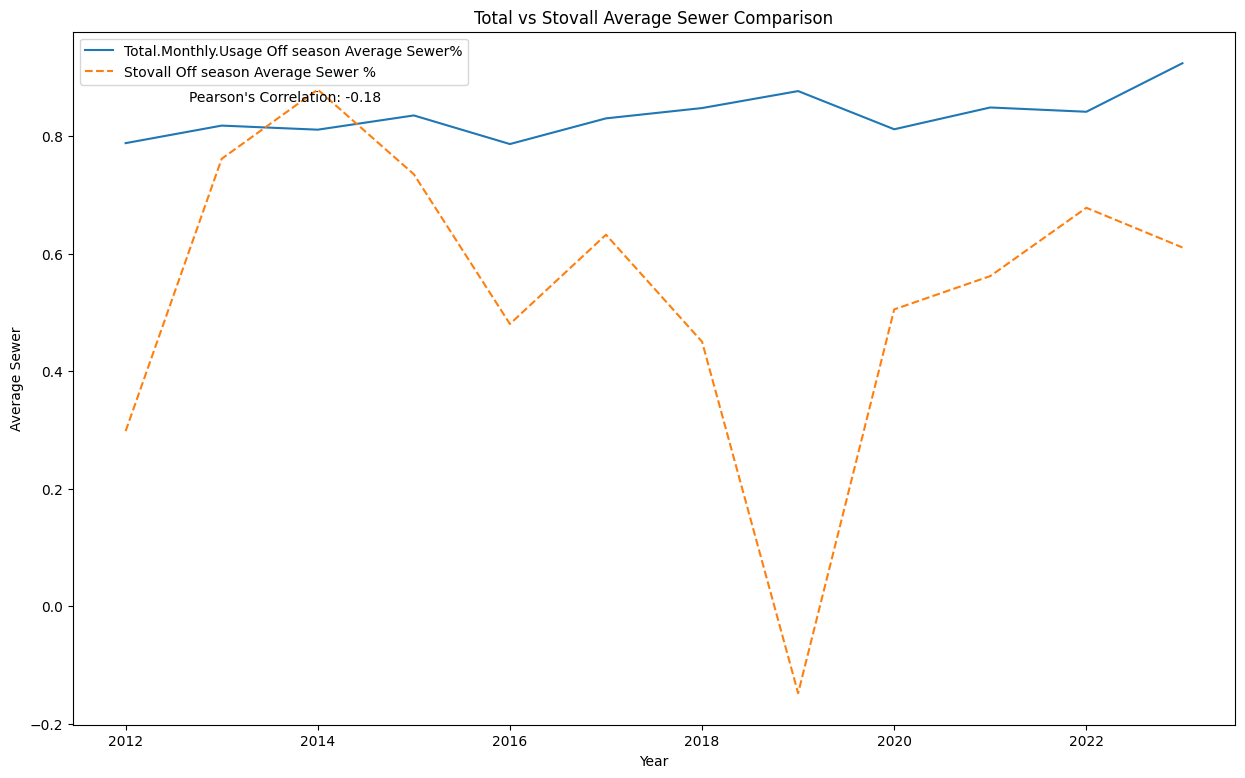

In [41]:
from scipy.stats import pearsonr

# Filter data for the building 'Total.Monthly.Usage'
df_building = building_dataframes.get('Total.Monthly.Usage', pd.DataFrame())

# Group by 'Year' and 'Season', then calculate the mean
df_grouped = df_building.groupby(['Year', 'Season']).mean().reset_index()

# Filter data for the building 'Stovall'
df_building_b = building_dataframes.get('Stovall', pd.DataFrame())

# Group by 'Year' and 'Season', then calculate the mean
df_grouped_b = df_building_b.groupby(['Year', 'Season']).mean().reset_index()


# Create the plot
fig, ax = plt.subplots(figsize=(15, 9))

for season in ['Off season']:
    df_season_total = df_grouped[df_grouped['Season'] == season]
    df_season_brc = df_grouped_b[df_grouped_b['Season'] == season]
    
    ax.plot(df_season_total['Year'], df_season_total['Sewer%'], label=f"Total.Monthly.Usage {season} Average Sewer%")
    ax.plot(df_season_brc['Year'], df_season_brc['%'], label=f"Stovall {season} Average Sewer %", linestyle='--')
    
    # Calculate Pearson's correlation coefficient
    common_years = set(df_season_total['Year']) & set(df_season_brc['Year'])
    corr_data_total = df_season_total[df_season_total['Year'].isin(common_years)]['Sewer%'].dropna()
    corr_data_brc = df_season_brc[df_season_brc['Year'].isin(common_years)]['%'].dropna()
    
    # Find common years after dropping NaNs
    common_years_after_drop = set(corr_data_total.index) & set(corr_data_brc.index)
    
    # Filter the data again based on the common years
    corr_data_total = corr_data_total[corr_data_total.index.isin(common_years_after_drop)]
    corr_data_brc = corr_data_brc[corr_data_brc.index.isin(common_years_after_drop)]
    
    # Ensure both arrays have the same length after dropping NaNs
    if len(corr_data_total) == len(corr_data_brc):
        corr_coefficient, _ = pearsonr(corr_data_total, corr_data_brc)
        ax.text(0.1, 0.9, f"Pearson's Correlation: {corr_coefficient:.2f}", transform=ax.transAxes)
    else:
        ax.text(0.1, 0.9, "Could not compute Pearson's Correlation: Length mismatch after dropping NaNs", transform=ax.transAxes)

# Add labels and title
ax.set_title('Total vs Stovall Average Sewer Comparison')
ax.set_xlabel('Year')
ax.set_ylabel('Average Sewer')
ax.legend()

# Show the plot
plt.show()

### Linear model to predict Total Monthly Usage's Sewer% column

In [42]:
from scipy.stats import pearsonr

# Sample data for 'Total.Monthly.Usage' and 'BRC_LRC_Cplant_Baseball'
# These values are placeholders and should be replaced by actual data
total_monthly_usage_sewer = [3976000, 3724000, 3310000, 3218000, 2916000]  # Example values
brc_lrc_cplant_baseball_sewer = [1241000, 1379000, 925000, 959000, 240000]  # Example values

# Calculate Pearson's correlation coefficient
corr_coefficient, _ = pearsonr(total_monthly_usage_sewer, brc_lrc_cplant_baseball_sewer)

corr_coefficient

np.float64(0.8796844270567701)

### Linear model to predict Total Monthly Usage's Sewer% column

In [43]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

# DF with the target variable "sewer %"
df = building_dataframes['Total.Monthly.Usage']

# Drop rows where 'Sewer %' or any other relevant columns are NaN
df = df.dropna(subset=['Sewer%', 'Water Usage', 'Sewer Usage', 'Season'])

# Convert categorical column 'Season' to numerical (One-Hot Encoding)
df = pd.get_dummies(df, columns=['Season'], drop_first=True)

# Loop to add features from all building DataFrames
for building, building_df in building_dataframes.items():
    columns_to_merge = ['Date'] + [col for col in building_df.columns if col not in ['Date', 'Season', 'Year']]
    df = df.merge(building_df[columns_to_merge], on='Date', how='left', suffixes=('', f'_{building}'))

# Handle missing values (Filling NaNs with zeros in this example)
df.fillna(0, inplace=True)

# Update the feature set to include new columns
feature_columns = [col for col in df.columns if col not in ['Date', 'Sewer%']]
X = df[feature_columns]
y = df['Sewer%']

# Step 3: Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Model Training
model = LinearRegression()
model.fit(X_train, y_train)

# Get the feature importances (coefficients) from the trained model
feature_importance = model.coef_

# Step 5: Model Evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 9.969385933493577e-24


##### Given that my target variable "Sewer%" is limited to a range between 0 and 1, a very low Mean Squared Error (MSE) of 1.1133250655902994e-24 is not necessarily a red flag for overfitting. In this specific context, the low MSE indicates a high level of accuracy in the model's predictions, which aligns well with the constrained scale of the target variable.

### Summary of Importance

In [44]:
from pprint import pprint  # Pretty-printing library

# Creating a dictionary to map feature names to their importances
feature_importance_dict = dict(zip(feature_columns, feature_importance))

# Sorting the dictionary by absolute value of the feature importance
feature_importance_sorted = {k: v for k, v in sorted(feature_importance_dict.items(), key=lambda item: abs(item[1]), reverse=True)}

# Filtering out features with small coefficients (e.g., absolute value less than 1e-15)
filtered_feature_importance = {k: v for k, v in feature_importance_sorted.items() if abs(v) > 1e-15}

# Pretty-print the filtered feature importance
pprint("Filtered and Sorted Feature Importance:")
pprint(filtered_feature_importance)

'Filtered and Sorted Feature Importance:'
{'%_Maintenance.Building_Green.House': np.float64(-1.0886001494110612e-15),
 '%_Stovall': np.float64(4.607708146459791e-15),
 'Annual % ': np.float64(8.918527504465196e-11),
 'Annual % _Total.Monthly.Usage': np.float64(-8.918663975315928e-11),
 'Month': np.float64(-1.9076783717687853e-10),
 'Month_Aerobic': np.float64(1.1192786141447598e-10),
 'Month_BRC_LRC_Cplant_Baseball': np.float64(-8.703753708810167e-11),
 'Month_Biology.Center': np.float64(3.2948748099713444e-11),
 'Month_Chapel': np.float64(4.7556344066107264e-11),
 'Month_Global.Learning.Center': np.float64(1.277109496562759e-10),
 'Month_Graduate.Center': np.float64(3.2948657894092694e-11),
 'Month_Hamill_Timko_Dorms': np.float64(1.1489307843814308e-11),
 'Month_Howard': np.float64(3.35695521280824e-11),
 'Month_Intramural.Field': np.float64(3.2948893816485426e-11),
 'Month_Mabee': np.float64(3.7976958513953496e-11),
 'Month_Maintenance.Building_Green.House': np.float64(3.297341334338

##### The 'Sewer%_Total.Monthly.Usage' variable has a coefficient near 1, making it the most influential feature in predicting "Sewer%." Other features like 'Sewer Usage' and 'Water Usage' have much smaller coefficients, indicating less impact. Both positive and negative coefficients suggest varied relationships with the target.

In [45]:
from sklearn.feature_selection import RFE

# Initialize the RFE model
# Consider updating n_features_to_select based on the new number of features
selector = RFE(estimator=model, n_features_to_select=5, step=1)

# Fit RFE
selector = selector.fit(X, y)

# Display results
print("Num Features:", selector.n_features_)
print("Selected Features:", selector.support_)
print("Feature Ranking:", selector.ranking_)

# Optionally, get the names of the selected features
selected_features = [feature for feature, support in zip(X.columns, selector.support_) if support]
print("Names of selected features:", selected_features)

Num Features: 5
Selected Features: [ True  True False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False  True  True  True False False]
Feature Ranking: [ 1  1 26 17 18 14 72 44 27 24 64 45 23  3 73 71 51  8 69 43 11 16 67 34
 32 22 70 47 28 21 41 36 10 25 52 48 13 58 59 57 20 49 50 31 19 35 54 68
 15 65 60 12 46 56 66 33  5 61 42  7 40 39 38 63 62 53 74 37  6 30 29 55
  2  1  1  1  9  4]
Names of selected features: ['Water Usage', 'Sewer Usage', 'Water Usage_Total.Monthly.Usage', 'Sewer Usage_Total.Monthly.Usage', 'Sewer%_Total.Monthly.Usage']


##### After running Recursive Feature Elimination (RFE), the model identifies 5 features as the most important for predicting "Sewer%". These are 'Water Usage', 'Sewer Usage', and their equivalents in 'Total.Monthly.Usage', as well as 'Sewer%_Total.Monthly.Usage'. The feature ranking array confirms this by assigning these features a rank of 1, indicating highest importance.